## Dengue Dataset Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
from dateutil.relativedelta import relativedelta

In [2]:
dengue = pd.read_csv('./weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv')

In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         530 non-null    int64  
 1   eweek        530 non-null    int64  
 2   type_dengue  530 non-null    object 
 3   number       522 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.7+ KB


In [4]:
# Getting combined year and week number

dengue['year_week_only'] = dengue['year'].astype(str) + "-" + dengue['eweek'].astype(str)

In [5]:
dengue.head()

,year,eweek,type_dengue,number,year_week_only
0,2014,1,Dengue,436.0,2014-1
1,2014,1,DHF,1.0,2014-1
2,2014,2,Dengue,479.0,2014-2
3,2014,2,DHF,0.0,2014-2
4,2014,3,Dengue,401.0,2014-3


In [6]:
# Function to get dates of based on week of the year (date = first Mon of the week)

def return_date(d):
    return datetime.datetime.strptime(d + '-1', "%Y-%W-%w")

In [7]:
# Applying function on dataframe

dengue['date'] = dengue.apply(lambda x: return_date(x.year_week_only), axis=1)
dengue.head()

,year,eweek,type_dengue,number,year_week_only,date
0,2014,1,Dengue,436.0,2014-1,2014-01-06
1,2014,1,DHF,1.0,2014-1,2014-01-06
2,2014,2,Dengue,479.0,2014-2,2014-01-13
3,2014,2,DHF,0.0,2014-2,2014-01-13
4,2014,3,Dengue,401.0,2014-3,2014-01-20


In [8]:
# Creating new column for month

dengue['month'] = dengue.date.dt.month

In [9]:
# Dropping unnecessary columns

dengue.drop(['year_week_only'], inplace = True, axis = 1)

In [10]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         530 non-null    int64         
 1   eweek        530 non-null    int64         
 2   type_dengue  530 non-null    object        
 3   number       522 non-null    float64       
 4   date         530 non-null    datetime64[ns]
 5   month        530 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 25.0+ KB


In [11]:
# checking number of null values

dengue['number'].isnull().sum()

8

In [12]:
# looking at the null values

dengue[dengue['number'].isnull()]

,year,eweek,type_dengue,number,date,month
210,2015,53,Dengue,NaN,2016-01-04,1
211,2015,53,DHF,NaN,2016-01-04,1
316,2016,53,Dengue,NaN,2017-01-02,1
317,2016,53,DHF,NaN,2017-01-02,1
422,2017,53,Dengue,NaN,2018-01-01,1
423,2017,53,DHF,NaN,2018-01-01,1
528,2018,53,Dengue,NaN,2018-12-31,12
529,2018,53,DHF,NaN,2018-12-31,12


These null values appear because most years have 52 weeks except for 2014. Week 53 typically straddles 2 years. Week 53 in 2017 is actually the first week of 2018 (starts on 1/1/2018). Therefore, propose dropping these rows.

In [13]:
# Dropping rows with null values for "number"

dengue.dropna(inplace = True)

In [14]:
# checking again the number of null values

dengue['number'].isnull().sum()

0

In [15]:
# sort dataframe by date

dengue.sort_values(by = 'date', ascending = True, inplace = True)
dengue.head()

,year,eweek,type_dengue,number,date,month
0,2014,1,Dengue,436.0,2014-01-06,1
1,2014,1,DHF,1.0,2014-01-06,1
2,2014,2,Dengue,479.0,2014-01-13,1
3,2014,2,DHF,0.0,2014-01-13,1
4,2014,3,Dengue,401.0,2014-01-20,1


In [16]:
# Keeping only relevant columns

dengue = dengue[['type_dengue', 'date', 'year', 'month', 'number']]
dengue.reset_index(drop = True, inplace = True)

In [17]:
# mean number of cases of dengue and Dengue Hemorrhagic Fever

dengue.groupby('type_dengue')['number'].agg('mean')

type_dengue
DHF         0.379310
Dengue    186.421456
Name: number, dtype: float64

Text(0, 0.5, 'Number')

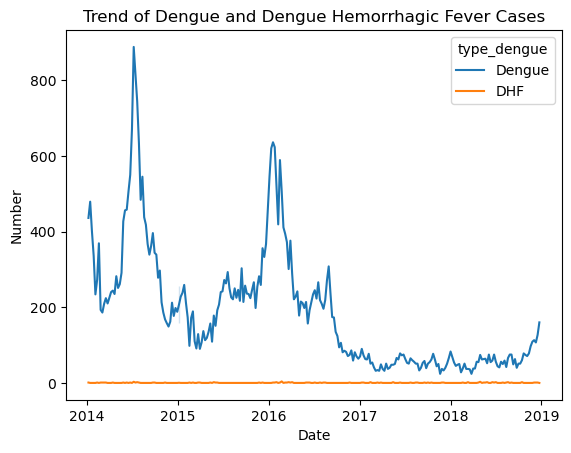

In [18]:
# line plot over time of both

sns.lineplot(data=dengue, x="date", y="number", hue="type_dengue")
plt.title("Trend of Dengue and Dengue Hemorrhagic Fever Cases")
plt.xlabel("Date")
plt.ylabel("Number") 

In [19]:
# Splitting the dataframe by type of illness

dengue_only = dengue[dengue['type_dengue'] == 'Dengue']
dhf_only = dengue[dengue['type_dengue'] == 'DHF']

In [20]:
dengue_only = dengue_only[['date', 'year', 'month', 'number']]
dengue_only.head()

,date,year,month,number
0,2014-01-06,2014,1,436.0
2,2014-01-13,2014,1,479.0
4,2014-01-20,2014,1,401.0
6,2014-01-27,2014,1,336.0
8,2014-02-03,2014,2,234.0


In [21]:
dhf_only = dhf_only[['date', 'year', 'month', 'number']]
dhf_only.head()

,date,year,month,number
1,2014-01-06,2014,1,1.0
3,2014-01-13,2014,1,0.0
5,2014-01-20,2014,1,0.0
7,2014-01-27,2014,1,0.0
9,2014-02-03,2014,2,0.0


Text(0.5, 1.0, 'Distribution of dengue case count by week')

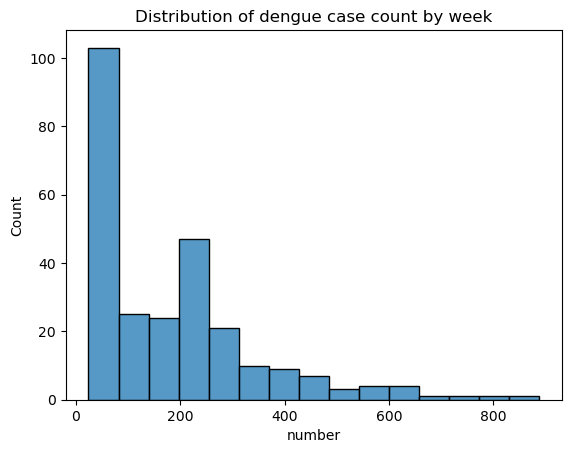

In [22]:
# showing distribution of dengue cases

sns.histplot(data = dengue_only, x = 'number').set_title('Distribution of dengue case count by week')

Text(0.5, 1.0, 'Distribution of DHF case count by week')

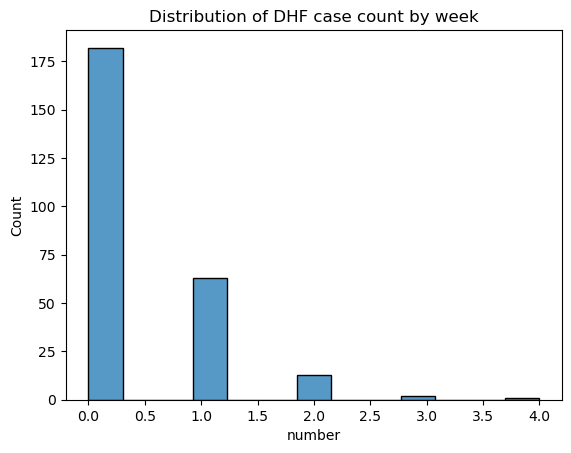

In [23]:
# showing distribution of DHF cases

sns.histplot(data = dhf_only, x = 'number').set_title('Distribution of DHF case count by week')

In [24]:
# grouping by year and month

grouped_dengue = dengue_only.groupby(['year', 'month'])['number'].agg('sum')
grouped_dengue = pd.DataFrame(grouped_dengue)

In [25]:
grouped_dengue.head()

number
year month        
2014 1      1810.0
     2      1069.0
     3      1054.0
     4      1001.0
     5      1230.0

In [26]:
# prepping dataset for yearly comparison graph

grouped_dengue2 = dengue_only.reset_index().pivot_table("number", "month", "year")
grouped_dengue2

year,2014,2015,2016,2017,2018
month,,,,,
1,362.00,245.25,606.00,71.60,59.60
2,267.25,163.75,489.80,55.75,41.75
3,210.80,121.80,360.75,36.75,33.50
4,250.25,119.00,245.00,39.25,52.20
5,307.50,144.75,203.20,50.40,60.25
6,528.20,206.40,199.00,72.00,66.00
7,770.75,269.50,238.25,58.40,49.40
8,471.25,233.60,240.60,47.75,60.50
9,361.60,247.75,180.00,47.50,56.75


In [27]:
# generate a list of shortened month names
short_month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# print the list
print(short_month_names)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


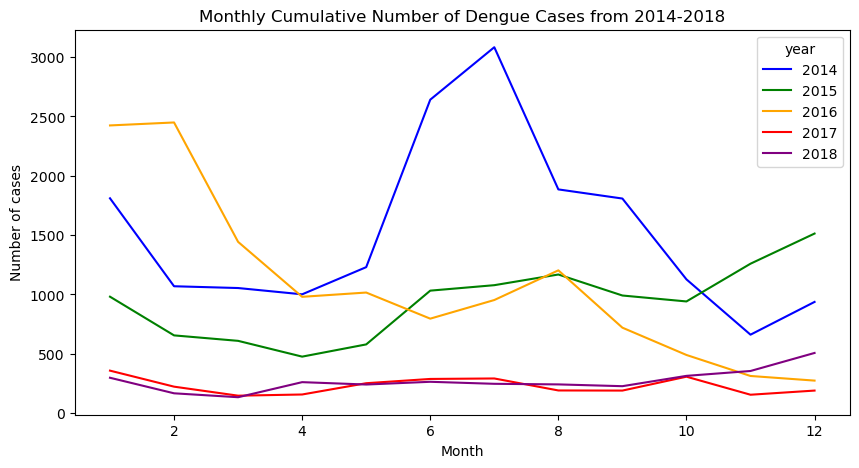

In [28]:
# Cumulative case number by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_dengue, x="month", y="number", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Cumulative Number of Dengue Cases from 2014-2018")
plt.xlabel("Month")
plt.ylabel("Number of cases") 

plt.show()

In [29]:
# grouping by year and month

grouped_dhf = dhf_only.groupby(['year', 'month'])['number'].agg('sum')
grouped_dhf = pd.DataFrame(grouped_dhf)

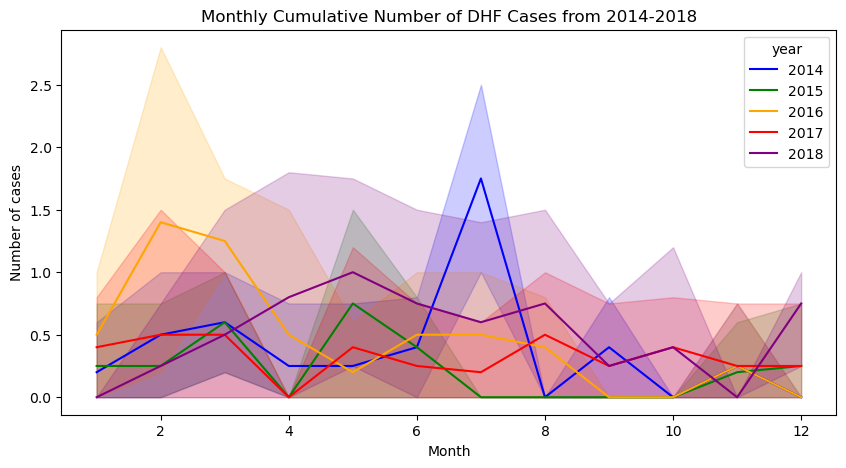

In [30]:
# Cumulative case number by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=dhf_only, x="month", y="number", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Cumulative Number of DHF Cases from 2014-2018")
plt.xlabel("Month")
plt.ylabel("Number of cases") 

plt.show()

In [31]:
#exporting datasets

# dengue and dengue haemorrhagic fever dataset
dengue.to_csv('./dengue.csv', index = False)

# dengue only dataset
# dengue_only.to_csv('./dengue_only.csv', index = False)

# # dengue haemorrhagic fever only dataset
# dhf_only.to_csv('./dhf_only.csv', index = False)